In [1]:
pip install torch===1.5.1 torchvision===0.6.1 -f https://download.pytorch.org/whl/torch_stable.html ipywidgets numpy matplotlib opencv-python tqdm

Looking in links: https://download.pytorch.org/whl/torch_stable.htmlNote: you may need to restart the kernel to use updated packages.



In [2]:
from __future__ import print_function
import torch
import torchvision
import torchvision.transforms as transforms
from ipywidgets import IntProgress
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class MyDataset(Dataset):
    def __init__(self, image_paths, target_paths, transform=None):
        self.image_paths = image_paths
        self.target_paths = target_paths
        self.transform = transform
        
    def __getitem__(self, index):
        x = (Image.open(self.image_paths[index])).resize((256, 256))
        x = np.array(x)
        y = pd.read_csv(self.target_paths[index], sep=',').to_numpy().sum().astype(np.double)
        #y  = y.astype(np.float32, copy=False)
        #y = cv2.resize(y, (256, 172))
        
        if self.transform:
            x = self.transform(x).double()
        
        return x, y
    
    def __len__(self):
        return len(self.image_paths)
    

image_paths = os.listdir('./ShanghaiTech/ShanghaiTech/part_A/train_data/shanghaitech_part_A_patches_9/train/')

for i in range(len(image_paths)):
    image_paths[i] = './ShanghaiTech/ShanghaiTech/part_A/train_data/shanghaitech_part_A_patches_9/train/' + image_paths[i]

target_paths = os.listdir('./ShanghaiTech/ShanghaiTech/part_A/train_data/shanghaitech_part_A_patches_9/train_den/')

for i in range(len(target_paths)):
    target_paths[i] = './ShanghaiTech/ShanghaiTech/part_A/train_data/shanghaitech_part_A_patches_9/train_den/' + target_paths[i]

transform = transforms.Compose(
    [
    #transforms.Resize((256, 172), interpolation=2),
    transforms.ToTensor(),
     #transforms.CenterCrop(10),
    #transforms.Normalize((.5, .5), (.5, .5))
    ]
)

trainset = MyDataset(image_paths, target_paths, transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=300, shuffle=True, num_workers=0)

dataiter = iter(trainloader)
images, labels = dataiter.next()

plt.imshow(images[0].numpy()[0])
plt.colorbar()
plt.show()


# validation

image_paths = os.listdir('./ShanghaiTech/ShanghaiTech/part_A/train_data/shanghaitech_part_A_patches_9/val/')

for i in range(len(image_paths)):
    image_paths[i] = './ShanghaiTech/ShanghaiTech/part_A/train_data/shanghaitech_part_A_patches_9/val/' + image_paths[i]

target_paths = os.listdir('./ShanghaiTech/ShanghaiTech/part_A/train_data/shanghaitech_part_A_patches_9/val_den/')

for i in range(len(target_paths)):
    target_paths[i] = './ShanghaiTech/ShanghaiTech/part_A/train_data/shanghaitech_part_A_patches_9/val_den/' + target_paths[i]

valset = MyDataset(image_paths, target_paths, transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=4, shuffle=True, num_workers=0)

In [4]:
'''
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((.5, .5, .5), (.5, .5, .5))]
)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
'''

"\ntransform = transforms.Compose(\n    [transforms.ToTensor(),\n     transforms.Normalize((.5, .5, .5), (.5, .5, .5))]\n)\n\ntrainset = torchvision.datasets.CIFAR10(root='./data', train=True,\n                                        download=True, transform=transform)\ntrainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)\ntestset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)\ntestloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)\nclasses = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')\n"

In [5]:
'''
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2, 0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
'''

"\nimport matplotlib.pyplot as plt\nimport numpy as np\n\ndef imshow(img):\n    img = img / 2 + 0.5\n    npimg = img.numpy()\n    plt.imshow(np.transpose(npimg, (1,2, 0)))\n    plt.show()\n    \ndataiter = iter(trainloader)\nimages, labels = dataiter.next()\n\nimshow(torchvision.utils.make_grid(images))\n\nprint(' '.join('%5s' % classes[labels[j]] for j in range(4)))\n"

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        # i ovde gore
        super(Net, self).__init__()
        # drugi arg
        self.conv1 = nn.Conv2d(1, 16, 5)
        self.pool = nn.MaxPool2d(4, 4)
        self.pool_micro = nn.MaxPool2d(2, 2)
        # prvi arg
        self.conv2 = nn.Conv2d(16, 32, 5)
        
        self.convx = nn.Conv2d(32, 16, 5)
        
        # kernel
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 1)
    
    def forward(self, x):
        # kako tacno dimenzionalnost radi ovde
        #print('0', x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        #print('1', x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        #print('2', x.shape)
        x = self.pool_micro(F.relu(self.convx(x)))
        #print('3', x.shape)
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        # print('TOOOO', x)
        
        return x

net = Net()
net.load_state_dict(torch.load('hiper_99.pth'))
net.double()
device = torch.device('cuda:0')
net.to(device)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (pool_micro): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (convx): Conv2d(32, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=1, bias=True)
)

In [15]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def avg(a):
    s = 0
    for e in a:
        s += e
    return s / len(a)

for epoch in range(100):
    running_loss = 0.0
    ran = tqdm(enumerate(trainloader, 0))
    loss_hist = []
    for i, data in ran:
        inputs, labels = data[0].to(device), data[1].to(device)
        
        # check without
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels.view(-1,1))
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        loss_hist.append(loss.item())
        
        ran.set_description("Avg. loss: {}".format(avg(loss_hist)))
        ran.refresh() # to show immediately the update
        
        #if i % 10 == 3:
        #    print('[%d, %5d] loss: %.3f' %
        #         (epoch + 1, i + 1, running_loss / 2000))
        #    running_loss = 0.0
        

print('Finished Training')

Avg. loss: 1645.2159744003195: : 20it [00:34,  1.74s/it]
Avg. loss: 1546.858621486327: : 18it [00:32,  1.82s/it] 

In [ ]:
PATH = './num_net_10.pth'
torch.save(net.state_dict(), PATH)

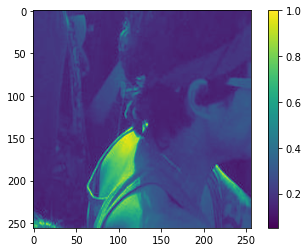

Prediction: tensor([[20.5062],
        [17.9076],
        [16.3965],
        [14.1582]], device='cuda:0', dtype=torch.float64,
       grad_fn=<AddmmBackward>)
Ground: tensor([ 1.0000, 19.9894,  4.3180, 38.0145], dtype=torch.float64)


In [12]:
dataiter = iter(valloader)
images, labels = dataiter.next()

images = images.to(device)


outputs = net(images)

plt.imshow(images.cpu()[0].numpy()[0])
plt.colorbar()
plt.show()

print('Prediction:', outputs)
print('Ground:', labels)
#print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))